In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table("Rg2_Globule.txt")

In [3]:
df.head()

,N
1.252651,10.0
1.296321,11.0
1.321984,12.0
1.374594,13.0
1.406893,14.0


In [4]:
df['Radius of Gyration'] = df.index

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.head(3)

,N,Radius of Gyration
0,10.0,1.252651
1,11.0,1.296321
2,12.0,1.321984


In [7]:
df =df.dropna(axis= 0)
df.head(3)

,N,Radius of Gyration
0,10.0,1.252651
1,11.0,1.296321
2,12.0,1.321984


In [8]:
from sklearn.model_selection import train_test_split

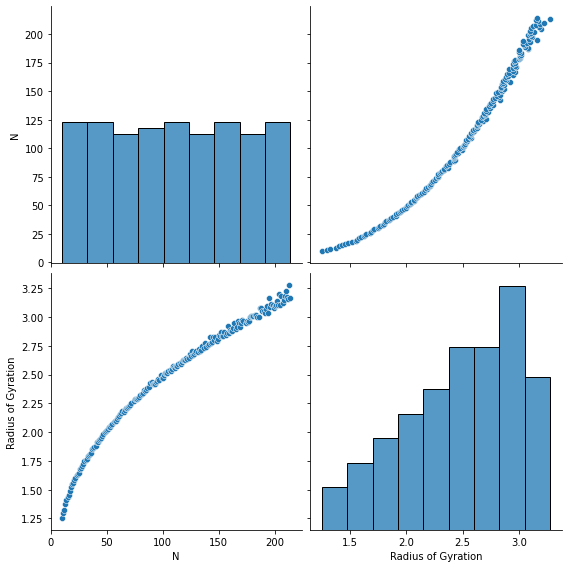

In [9]:
# plt.plot(figsize = (12,5))
sns.pairplot(df.iloc[:200], height=4)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['N'].values, df['Radius of Gyration'].values, test_size= 0.2,random_state=101 )

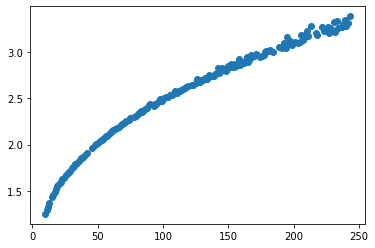

In [11]:
plt.scatter(X_train, y_train)

In [12]:
X_test = X_test.reshape(-1,1)
X_train = X_train.reshape(-1,1)

### Predicting Using Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
predictions = model.predict(X_test)

In [17]:
X_test.size

46

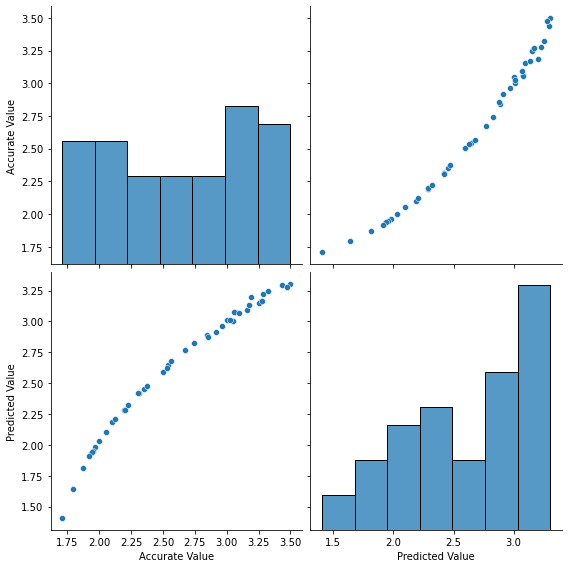

In [18]:
df2 = pd.DataFrame(predictions,y_test, columns={"Accurate Value"})
df2['Predicted Value'] = y_test
df2.index = np.arange(1,X_test.size+1,1)
sns.pairplot(df2, height= 4)

In [19]:
df2.head(3)

,Accurate Value,Predicted Value
1,2.190917,2.286641
2,2.097482,2.187724
3,3.156416,3.095297


In [20]:
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
r2_score(y_test,predictions)

0.9659186553053947

In [22]:
mean_squared_error(y_test,predictions)

0.008950777432889651

### Prediction using ANN

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [52]:
model = Sequential()
model.add(Dense(1))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
# model.add(Dense(10,activation="relu"))
# model.add(Dense(10,activation="relu"))
model.add(Dense(1))
model.compile(optimizer= Adam(learning_rate=0.01), loss= "mse" )

In [53]:
from keras_tuner import RandomSearch, Hyperband
from keras_tuner import HyperParameters

In [54]:
# tuner_search = RandomSearch(model,objective= 'val_loss')

In [55]:
model.fit(X_train,y_train,batch_size=16,epochs= 200, validation_data= (X_test,y_test))

Epoch 1/200
12/12 [==============================] - 0s 12ms/step - loss: 1.9293 - val_loss: 0.7414
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.7879 - val_loss: 0.5483
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6354 - val_loss: 0.3922
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 0.3948 - val_loss: 0.3154
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2631 - val_loss: 0.2240
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2091 - val_loss: 0.2239
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 0.1707 - val_loss: 0.1286
Epoch 8/200
12/12 [==============================] - 0s 5ms/step - loss: 0.1084 - val_loss: 0.0910
Epoch 9/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0856 - val_loss: 0.1212
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0636 - val_loss: 0.0454
Epoch 11

12/12 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.0155
Epoch 84/200
12/12 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0098
Epoch 85/200
12/12 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0152
Epoch 86/200
12/12 [==============================] - 0s 4ms/step - loss: 0.0166 - val_loss: 0.0125
Epoch 87/200
12/12 [==============================] - 0s 4ms/step - loss: 0.0144 - val_loss: 0.0087
Epoch 88/200
12/12 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0090
Epoch 89/200
12/12 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0096
Epoch 90/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.0090
Epoch 91/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0130 - val_loss: 0.0144
Epoch 92/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0152 - val_loss: 0.0094
Epoch 93/200


12/12 [==============================] - 0s 5ms/step - loss: 0.0124 - val_loss: 0.0101
Epoch 165/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.0100
Epoch 166/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.0080
Epoch 167/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0107 - val_loss: 0.0078
Epoch 168/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.0125
Epoch 169/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0160 - val_loss: 0.0125
Epoch 170/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0134 - val_loss: 0.0087
Epoch 171/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0126 - val_loss: 0.0071
Epoch 172/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0132
Epoch 173/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.0149
Epoc

In [56]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [57]:
predictions.T

array([[2.256067 , 2.1344078, 3.0994267, 2.39389  , 1.9215038, 3.2039511,
        1.9620571, 3.3346047, 3.1908853, 2.266205 , 2.936108 , 1.9417803,
        2.4265535, 2.3873572, 2.753191 , 1.5530806, 2.5833395, 2.1648223,
        2.968772 , 3.236614 , 2.8381166, 3.0210338, 3.386868 , 2.073578 ,
        3.0079682, 2.00261  , 2.8969111, 3.112492 , 1.931642 , 2.2966201,
        3.0145016, 1.9012272, 2.5506756, 3.1778197, 3.367269 , 3.0471644,
        2.694396 , 2.446152 , 1.7224724, 2.98837  , 3.1974177, 2.8446493,
        2.576807 , 1.8403976, 2.6029384, 3.1255572]], dtype=float32)

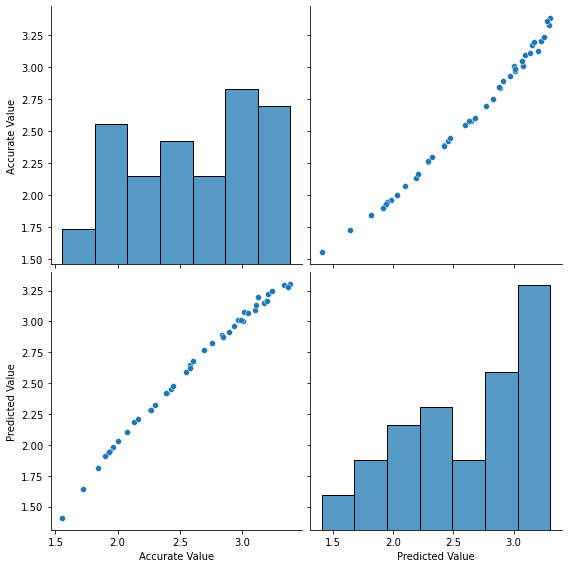

In [58]:
df2 = pd.DataFrame(predictions,y_test, columns={"Accurate Value"})
df2['Predicted Value'] = y_test
df2.index = np.arange(1,X_test.size+1,1)
sns.pairplot(df2, height = 4)

In [59]:
r2_score(y_test,predictions)

0.9911728172921871

In [60]:
mean_squared_error(y_test,predictions)

0.002318281408350412

### Using Random Search to improve ANN

In [33]:
import keras_tuner as kt
import tensorflow as tf

In [34]:

def build_model(hp):
  model = tf.keras.Sequential()
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units1, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='linear'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss="mse",
  )

  return model

In [35]:

tuner = RandomSearch(build_model,
  objective='val_loss',
  max_trials= 20,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='fashion_mnist',
  overwrite=True
)
tuner.search(X_train, y_train, epochs=30, validation_split=0.2)

Trial 20 Complete [00h 00m 09s]
val_loss: 0.4109063148498535

Best val_loss So Far: 0.003958775700690846
Total elapsed time: 00h 02m 59s
INFO:tensorflow:Oracle triggered exit


In [36]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor="val_loss", patience= 15, mode= "auto")

In [39]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
5/5 [==============================] - 0s 30ms/step - loss: 3478.9727 - val_loss: 111.6919
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 36.0193 - val_loss: 6.4308
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 4.0694 - val_loss: 0.4918
Epoch 4/200
5/5 [==============================] - 0s 11ms/step - loss: 1.2685 - val_loss: 0.6522
Epoch 5/200
5/5 [==============================] - 0s 12ms/step - loss: 0.5759 - val_loss: 0.8759
Epoch 6/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7071 - val_loss: 0.4309
Epoch 7/200
5/5 [==============================] - 0s 11ms/step - loss: 0.4770 - val_loss: 0.4719
Epoch 8/200
5/5 [==============================] - 0s 12ms/step - loss: 0.4640 - val_loss: 0.3923
Epoch 9/200
5/5 [==============================] - 0s 12ms/step - loss: 0.3985 - val_loss: 0.3527
Epoch 10/200
5/5 [==============================] - 0s 13ms/step - loss: 0.3602 - val_loss: 0.2987
Epoch 11/200


Epoch 84/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 85/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 86/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 87/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 88/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 9.4728e-04
Epoch 89/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 90/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 91/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 92/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 93/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 

5/5 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 7.4282e-04
Epoch 164/200
5/5 [==============================] - 0s 11ms/step - loss: 9.5255e-04 - val_loss: 0.0012
Epoch 165/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 166/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0034 - val_loss: 5.7586e-04
Epoch 167/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 168/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 169/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 7.2540e-04
Epoch 170/200
5/5 [==============================] - 0s 10ms/step - loss: 9.7105e-04 - val_loss: 7.8107e-04
Epoch 171/200
5/5 [==============================] - 0s 10ms/step - loss: 8.9814e-04 - val_loss: 9.3349e-04
Epoch 172/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0011 -

In [40]:
predictions = model.predict(X_test)


2/2 [==============================] - 0s 4ms/step


0.9948064440874664


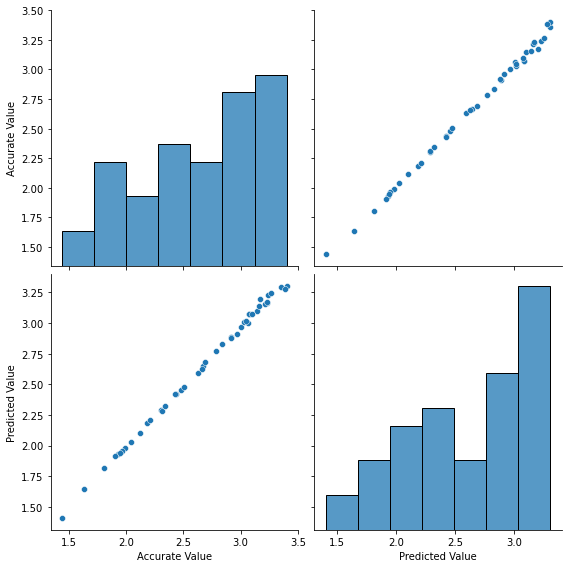

In [41]:
print(r2_score(y_test,predictions))
df2 = pd.DataFrame(predictions,y_test, columns={"Accurate Value"})
df2['Predicted Value'] = y_test
df2.index = np.arange(1,X_test.size+1,1)
sns.pairplot(df2, height = 4)